#Introduction


Section 1.1 of the NLTK book describes some pre-loaded books and pre-defined functions that come with them.  Section 1.2 reviews fundamental concepts about python lists and strings -- if you need to brush up on these concepts, then study this subsection carefully.  Be sure you know the difference between a *set* and a *list* and that you can work easily with python slices.

The part that I am most interested in having you focus on is Section 1.3, which introduces NLTK's frequency distribution data structure.  You need to have the books loaded and accessible from section 1.1 for this part to work.

##NLTK's Frequency Distribution Object

This data structure makes it easy to tally up frequencies across words and other items, and incorporate them into list comprehensions (and later we'll see the conditional frequency distribution as well).

These are the functions supported by FreqDis:

```
fdist = FreqDist(samples) create a frequency distribution containing the given samples
fdist[sample] += 1	increment the count for this sample
fdist['monstrous']	count of the number of times a given sample occurred
fdist.freq('monstrous')	frequency of a given sample
fdist.N()	total number of samples
fdist.most_common(n)	the n most common samples and their frequencies
for sample in fdist:	iterate over the samples
fdist.max()	sample with the greatest count
fdist.tabulate()	tabulate the frequency distribution
fdist.plot()	graphical plot of the frequency distribution
fdist.plot(cumulative=True)	cumulative plot of the frequency distribution
fdist1 |= fdist2	update fdist1 with counts from fdist2
fdist1 < fdist2	test if samples in fdist1 occur less frequently than in fdist2
```
The code below counts up all of the words in *Monty Python and the Holy Grail* (text6 in the nltk.book collection) and the final line shows the top 50 most frequent.

In [1]:
%matplotlib inline
import matplotlib
import nltk
from nltk.book import *        # loads in pre-defined texts
mp_freqdist = FreqDist(text6)  # compute the frequency distribution
mp_freqdist.most_common(50)      # show the top 50 (word, frequency) pairs

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


[(':', 1197),
 ('.', 816),
 ('!', 801),
 (',', 731),
 ("'", 421),
 ('[', 319),
 (']', 312),
 ('the', 299),
 ('I', 255),
 ('ARTHUR', 225),
 ('?', 207),
 ('you', 204),
 ('a', 188),
 ('of', 158),
 ('--', 148),
 ('to', 144),
 ('s', 141),
 ('and', 135),
 ('#', 127),
 ('...', 118),
 ('Oh', 110),
 ('it', 107),
 ('is', 106),
 ('-', 88),
 ('in', 86),
 ('that', 84),
 ('t', 77),
 ('No', 76),
 ('LAUNCELOT', 76),
 ('1', 76),
 ('your', 75),
 ('not', 70),
 ('GALAHAD', 69),
 ('KNIGHT', 68),
 ('What', 65),
 ('FATHER', 63),
 ('we', 62),
 ('You', 61),
 ('BEDEVERE', 61),
 ('We', 60),
 ('this', 59),
 ('no', 55),
 ('HEAD', 54),
 ('Well', 54),
 ('have', 53),
 ('GUARD', 53),
 ('Sir', 52),
 ('are', 52),
 ('A', 50),
 ('And', 50)]

**Task 1** Wow, those are some weird results.  It might make some sense to look at the actual text itself.  In the line below, write a line of code that pulls out the first 500 words of the text and shows them to you (hint: the text object is simply a list of strings).

In [7]:
print(text6[:500])

['SCENE', '1', ':', '[', 'wind', ']', '[', 'clop', 'clop', 'clop', ']', 'KING', 'ARTHUR', ':', 'Whoa', 'there', '!', '[', 'clop', 'clop', 'clop', ']', 'SOLDIER', '#', '1', ':', 'Halt', '!', 'Who', 'goes', 'there', '?', 'ARTHUR', ':', 'It', 'is', 'I', ',', 'Arthur', ',', 'son', 'of', 'Uther', 'Pendragon', ',', 'from', 'the', 'castle', 'of', 'Camelot', '.', 'King', 'of', 'the', 'Britons', ',', 'defeator', 'of', 'the', 'Saxons', ',', 'sovereign', 'of', 'all', 'England', '!', 'SOLDIER', '#', '1', ':', 'Pull', 'the', 'other', 'one', '!', 'ARTHUR', ':', 'I', 'am', ',', '...', 'and', 'this', 'is', 'my', 'trusty', 'servant', 'Patsy', '.', 'We', 'have', 'ridden', 'the', 'length', 'and', 'breadth', 'of', 'the', 'land', 'in', 'search', 'of', 'knights', 'who', 'will', 'join', 'me', 'in', 'my', 'court', 'at', 'Camelot', '.', 'I', 'must', 'speak', 'with', 'your', 'lord', 'and', 'master', '.', 'SOLDIER', '#', '1', ':', 'What', '?', 'Ridden', 'on', 'a', 'horse', '?', 'ARTHUR', ':', 'Yes', '!', 'SOLDIE

**Task 2** Now that you've looked at the text, what are two reasons for these strange results?

*Your Answer 1 goes here: Some combined word are segamented into none sense words, like "you're" is divided into "you", "'", and "ve" while "ve" is actually not a word.

*Your Answer 2 goes here: Some words with a dash are divided into two words, like "air-speed" is segamentaed into "air", "-", and "speed".


**Task 3** Address one of the problems by modifying the text of Monty Python and rerunning the frequency distribution calculation.  In the box below write your code to modify the text:

In [9]:
import re
newtext = []
i = 0
while i < (len(text6) - 3):
    if (text6[i+1] == "'" and re.search('\w+', text6[i]) and re.search('\w+', text6[i+2])) or (text6[i+1] == "-" and text6[i+2] != "-"):
        newtext.append(text6[i] + text6[i+1] + text6[i+2])
        i += 3
    else:
        newtext.append(text6[i])
        i += 1
print(newtext)

['SCENE', '1', ':', '[', 'wind', ']', '[', 'clop', 'clop', 'clop', ']', 'KING', 'ARTHUR', ':', 'Whoa', 'there', '!', '[', 'clop', 'clop', 'clop', ']', 'SOLDIER', '#', '1', ':', 'Halt', '!', 'Who', 'goes', 'there', '?', 'ARTHUR', ':', 'It', 'is', 'I', ',', 'Arthur', ',', 'son', 'of', 'Uther', 'Pendragon', ',', 'from', 'the', 'castle', 'of', 'Camelot', '.', 'King', 'of', 'the', 'Britons', ',', 'defeator', 'of', 'the', 'Saxons', ',', 'sovereign', 'of', 'all', 'England', '!', 'SOLDIER', '#', '1', ':', 'Pull', 'the', 'other', 'one', '!', 'ARTHUR', ':', 'I', 'am', ',', '...', 'and', 'this', 'is', 'my', 'trusty', 'servant', 'Patsy', '.', 'We', 'have', 'ridden', 'the', 'length', 'and', 'breadth', 'of', 'the', 'land', 'in', 'search', 'of', 'knights', 'who', 'will', 'join', 'me', 'in', 'my', 'court', 'at', 'Camelot', '.', 'I', 'must', 'speak', 'with', 'your', 'lord', 'and', 'master', '.', 'SOLDIER', '#', '1', ':', 'What', '?', 'Ridden', 'on', 'a', 'horse', '?', 'ARTHUR', ':', 'Yes', '!', 'SOLDIE

**Task 4** In the box below, show the output after applying this version of the text to a FreqDist.

In [10]:
new_freqdist = FreqDist(newtext)
new_freqdist.most_common(50)

[(':', 1196),
 ('.', 816),
 ('!', 800),
 (',', 731),
 ('[', 319),
 (']', 312),
 ('the', 297),
 ('ARTHUR', 225),
 ('?', 207),
 ('I', 204),
 ('you', 188),
 ('a', 182),
 ('of', 158),
 ('--', 148),
 ('to', 143),
 ('and', 131),
 ('#', 127),
 ('...', 118),
 ('Oh', 110),
 ('is', 101),
 ('it', 88),
 ('in', 85),
 ('No', 76),
 ('LAUNCELOT', 76),
 ('1', 76),
 ('your', 75),
 ('that', 71),
 ('GALAHAD', 69),
 ('not', 66),
 ('KNIGHT', 64),
 ('What', 63),
 ('FATHER', 63),
 ('BEDEVERE', 61),
 ('this', 57),
 ('no', 55),
 ('HEAD', 54),
 ('Well', 54),
 ('have', 53),
 ('GUARD', 53),
 ('are', 52),
 ('Sir', 51),
 ('A', 50),
 ('And', 50),
 ('on', 47),
 ('VILLAGER', 47),
 ('You', 46),
 ('we', 46),
 ('me', 46),
 ('boom', 45),
 ('We', 45)]

**Task 5** How if at all has the output changed?

*Your Answer Goes Here: Since I consider the combined word as a single one, "'" and "-" are no longer exited in the top 50 common words.

**Task 6** Following the example from the book, show a cumulative frequency plot for the words in Monty Python as newly computed, in the box below.

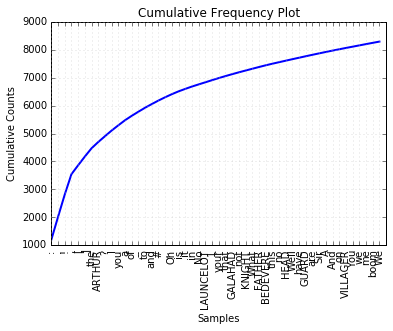

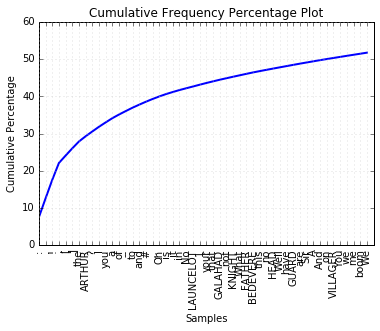

In [11]:
new_freqdist.plot(50, title = "Cumulative Frequency Plot", cumulative=True)

# The following codes are meant to re-write plot function of FreqDist Class to support cumulative percents plot.
### Most of the codes of function plot are from ntlk FreqDist class plot function, just change the freqs to percentage.
from nltk.probability import FreqDist
from nltk import compat

class FreqDistProbability(FreqDist):
    def _get_kwarg(sef, kwargs, key, default):
        if key in kwargs:
            arg = kwargs[key]
            del kwargs[key]
        else:
            arg = default
        return arg
    
    def plot(self, *args, **kwargs):
        try:
            from matplotlib import pylab
        except ImportError:
            raise ValueError('The plot function requires matplotlib to be installed.')

        if len(args) == 0:
            args = [len(self)]
        samples = [item for item, _ in self.most_common(*args)]

        cumulative = self._get_kwarg(kwargs, 'cumulative', False)
        if cumulative:
            freqs = list(self._cumulative_frequencies(samples))
            ylabel = "Cumulative Percentage"
        else:
            freqs = [self[sample] for sample in samples]
            ylabel = "Counts"
        percents = [f*100/self.N() for f in freqs]

        pylab.grid(True, color="silver")
        if not "linewidth" in kwargs:
            kwargs["linewidth"] = 2
        if "title" in kwargs:
            pylab.title(kwargs["title"])
            del kwargs["title"]
        pylab.plot(percents, **kwargs)
        pylab.xticks(range(len(samples)), [compat.text_type(s) for s in samples], rotation=90)
        pylab.xlabel("Samples")
        pylab.ylabel(ylabel)
        pylab.show()

new_freqdist_percents = FreqDistProbability(newtext)
new_freqdist_percents.plot(50, title = "Cumulative Frequency Percentage Plot", cumulative=True)

**Task 7** In the box below, write a list comprehension that users the FreqDist you computed above to find all words in *Monty Python* that are longer than 5 characters long and occur at least 5 times (hint: the text shows how to do a variation of this).  
Show the output sorted in alphabetical order.

In [12]:
sorted(set(w for w in newtext if len(w) > 5 and new_freqdist[w] >= 5))

['ARTHUR',
 'Aaaaugh',
 'Arthur',
 'BEDEVERE',
 'BRIDGEKEEPER',
 'Bedevere',
 'Bridge',
 'Britons',
 'CART-MASTER',
 'CARTOON',
 'CHARACTER',
 'CONCORDE',
 'CUSTOMER',
 'Camelot',
 'Castle',
 'Concorde',
 'DENNIS',
 'English',
 'FATHER',
 'FRENCH',
 'Father',
 'French',
 'GALAHAD',
 'GUARDS',
 'GUESTS',
 'Galahad',
 'HERBERT',
 'INSPECTOR',
 'KNIGHT',
 'KNIGHTS',
 'Knight',
 'Knights',
 'LAUNCELOT',
 'Launcelot',
 'MAYNARD',
 'MIDDLE',
 'MINSTREL',
 'NARRATOR',
 'OFFICER',
 'PERSON',
 'PIGLET',
 'Please',
 'RANDOM',
 'SOLDIER',
 "That's",
 'VILLAGER',
 "You're",
 'afraid',
 'angels',
 'better',
 'carried',
 'castle',
 'chanting',
 'coconut',
 'course',
 "didn't",
 "doesn't",
 'domine',
 'dramatic',
 'easily',
 'escape',
 'father',
 'forest',
 'giggle',
 'killed',
 'knight',
 'knights',
 'master',
 'mumble',
 'nothing',
 'people',
 'please',
 'questions',
 'rabbit',
 'really',
 'requiem',
 'sacred',
 'second',
 'shrubbery',
 'simple',
 'singing',
 'spanking',
 'squeak',
 'swallow',
 'ta